<a href="https://colab.research.google.com/github/ed1rac/Dissertacao-Ed/blob/master/Classifica%C3%A7%C3%A3o_Mestrado_Redes_Neurais_MLP_e_outros_Vers%C3%A3o_NOVA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classificação de Conflitos entre Políticas de Controle de Acesso
## Redes Neurais- MLP e outros classificadores
Arquivo de políticas - versão 7

Este Notebook mostra o treinamento de um MLP (Rede Neural Multicamadas) usando o classificador **MLPClassifier** da biblioteca **sklearn**. Além de utilizar diversos outros classificadores para comparação com este.

Ele demonstra também os experimentos na construção de uma arquitetura de uma rede neural com a estratégia de testes sendo a divisão da base (*split*) em atributos previsores e a classe com cerca de **75%** da base sendo usada para treinamento da rede e **25%** para teste.

É importante também pelo pré-processamento focado em um tratamento dos dados categóricos do *dataset* e sua conversão para dados numéricos e divisão da base original em dois conjuntos de dados (*previsores e classe*)

Há também uma função de geração automática das políticas


In [ ]:
config IPCompleter.greedy = True # para o autocomplete

In [ ]:
#importação das bibliotecas principais
import pandas as pd
import numpy as np

# Geração das políticas

In [ ]:
#Geração das políticas
from random import randint

def get_aleatorio(max):
  return randint(0,max-1)

def gera_uma_politica(num_politica):
  #str = '';
  numero = repr(num_politica+1)
  string = 'Policy' + numero + ', ' + acesso[get_aleatorio(tamAcesso)] + ', ' + org[get_aleatorio(tamAcesso)] + ', ' + sujeito[get_aleatorio(tamAcesso)] + ', ' + acao[get_aleatorio(tamAcesso)] + ', ' +  objeto[get_aleatorio(tamAcesso)]
  #print(string)
  return string

def exibe_politicas(array_politicas):
  for i in range(0,len(array_politicas)):
    linha = array_politicas[i]
    print(linha)

def gera_politicas(politicas, quant):  
  for i in range(0,quant):
    politicas.append(gera_uma_politica(i))

acesso = ["Permitted", "Forbidden", "Obliged"] #KP
org = ['UFAC', 'CCET', 'CCSJA', 'Administrative_Unit', 'CFET', 'Uninorte',
       'Comite_Etica_Em_Pesquisa', 'CPA', 'Unidade_Administrativa',
       'FAMETA', 'IFAC'] #ORG
sujeito = ['Secretario_de_Curso_Academico', 'Sandra_Maria_Soares_da_Rocha',
       'Outro_Usuario', 'Secretario_de_Centros_Academicos',
       'Jaider_Moreira_de_Almeida', 'Secretarios', 'Grupo_IPTU',
       'Socorro_Pontes', 'Jose_Rodrigues_Bardalles', 'Grupo_Almoxarifado',
       'Usuario_Qualquer', 'Joao_Josino',
       'Secretario_de_Unidade_Administrativa', 'PROTOCOLIZADOR3',
       'PROTOCOLIZADOR1', 'Joao_Paulo', 'Joao_Calvino', 'Maria_Das_Dores',
       'Professor', 'Coordenador', 'Pro_Reitora_Academica',
       'Setor_Administrativo', 'Joana_Siqueira', 'Francisco_Jose_Souza',
       'FranciscoJose_Souza', 'Marcos_Ponte', 'Marcos_Ponts',
       'Secretario_e_Unidade_Administrativa', 'Estagiario3',
       'Estagiario1', 'Vanessa_Lima', 'Janaina_Souza',
       'Usuario_Terceirizado', 'Jorge_Jesus', 'Aline_Moreira',
       'Raimundo_Nonato', 'Francisco_Mendes', 'Italo_Calvino',
       'Vanessa_Souza', 'Eliana_Maria_de_Souza', 'Francisco_Carlos',
       'Raimunda_Souza', 'Marcos_Pontes', 'Ana_Ester'] #SR
acao = ['Abertura', 'Solicitar', 'Acessar', 'Gerar', 'Calcular',
        'Matricular', 'Solicitacao', 'Analise', 'Requisitar', 'Criar',
        'Inserir', 'Cadastrar', 'Nova', 'Alterar', 'Efetivar',
        'LancarMedia', 'VoltarLancamento', 'SolicitacaoAbertura',
        'Cancelamento', 'Acess', 'Record', 'Create', 'Generate', 'Open',
        'Close'] #AA    
objeto = ['Documentos', 'Produtos', 'Almoxarifado', 'Materiais',
        'Planilhas_de_Calculo', 'IPTU', 'Portal_do_Aluno', 'Aluno',
        'Central_de_Copias', 'Central_de_Copias_Analise', 'Material',
        'Guia_de_Requisicao', 'Convencao', 'MatriculaAluno', 'Notas',
        'Process', 'ProcNURCADesp', 'ProcessDispatch', 'BuildDispatch',
        'FGTS', 'entral_de_Copias', 'Biblioteca'] #OV   

tamAcesso = len(acesso)
tamOrg = len(org)
tamSujeito = len(sujeito)
tamAcao = len(acao)
tamObjeto = len(objeto)

politicas = [];
quantidade_gerada = 100
gera_politicas(politicas, quantidade_gerada)

print(politicas)
print()
print('Exibindo as políticas')
print()
exibe_politicas(politicas)

['Policy1, Obliged, UFAC, Secretario_de_Curso_Academico, Acessar, Produtos', 'Policy2, Permitted, UFAC, Secretario_de_Curso_Academico, Acessar, Documentos', 'Policy3, Obliged, CCSJA, Outro_Usuario, Abertura, Almoxarifado', 'Policy4, Forbidden, UFAC, Secretario_de_Curso_Academico, Abertura, Documentos', 'Policy5, Permitted, CCSJA, Outro_Usuario, Abertura, Almoxarifado', 'Policy6, Permitted, CCSJA, Outro_Usuario, Acessar, Almoxarifado', 'Policy7, Forbidden, UFAC, Sandra_Maria_Soares_da_Rocha, Acessar, Produtos', 'Policy8, Permitted, UFAC, Outro_Usuario, Solicitar, Produtos', 'Policy9, Forbidden, UFAC, Secretario_de_Curso_Academico, Solicitar, Documentos', 'Policy10, Permitted, CCET, Secretario_de_Curso_Academico, Solicitar, Produtos', 'Policy11, Obliged, CCET, Secretario_de_Curso_Academico, Acessar, Produtos', 'Policy12, Obliged, UFAC, Sandra_Maria_Soares_da_Rocha, Abertura, Almoxarifado', 'Policy13, Forbidden, CCSJA, Outro_Usuario, Solicitar, Almoxarifado', 'Policy14, Permitted, CCSJA, 

In [ ]:
teste = pd.DataFrame(np.array(politicas), columns=['politica'])
#print(teste)
teste.head()


,politica
0,"Policy1, Obliged, UFAC, Secretario_de_Curso_Ac..."
1,"Policy2, Permitted, UFAC, Secretario_de_Curso_..."
2,"Policy3, Obliged, CCSJA, Outro_Usuario, Abertu..."
3,"Policy4, Forbidden, UFAC, Secretario_de_Curso_..."
4,"Policy5, Permitted, CCSJA, Outro_Usuario, Aber..."


In [ ]:
teste.shape

(100, 1)

In [ ]:
teste.to_csv('politicas_geradas.csv', index=False)

In [ ]:
#retira as aspas
with open("politicas_geradas.csv", "rt") as fin:
    with open("politicas_geradas_out.csv", "wt") as fout:
        for line in fin:
            fout.write(line.replace("\"" , ""))



In [ ]:
#altera a primeira linha pelas colunas corretas
from io import StringIO

buffer = StringIO()

with open('politicas_geradas_out.csv', 'r') as stream:
    for index, line in enumerate(stream):
        # index == 0 representa a primeira linha do arquivo:
        buffer.write('Politica,Acesso,Organizacao,Sujeito,Acao,Objeto\n' if index == 0 else line)

with open('politicas_geradas_final.csv', 'w') as stream:
    stream.write(buffer.getvalue())

# Carregamento da base e início das análises

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#carregamento da base
#base = pd.read_csv(r"C:\Users\Ed\Dropbox\!!! - Mestrado\!!! - UFAC\!! Temas - Dissertacao\Acces Control\Ed\DataSetPoliticas-versao-7.csv")
arquivo = r"/content/drive/My Drive/##Dissertacao/bases/DataSetPoliticas-versao-7.csv"
base = pd.read_csv(arquivo)

## Formato da base

In [ ]:
base.shape

(430, 6)

In [ ]:
base.head(12)

,Acesso,Organizacao,Sujeito,Acao,Objeto,Conflito
0,Permitted,UFAC,Secretario_de_Curso_Academico,Abertura,Documentos,0
1,Forbidden,UFAC,Sandra_Maria_Soares_da_Rocha,Abertura,Documentos,0
2,Permitted,UFAC,Outro_Usuario,Solicitar,Produtos,0
3,Forbidden,UFAC,Secretario_de_Centros_Academicos,Solicitar,Produtos,0
4,Permitted,UFAC,Outro_Usuario,Acessar,Almoxarifado,0
5,Forbidden,UFAC,Jaider_Moreira_de_Almeida,Acessar,Almoxarifado,0
6,Permitted,UFAC,Secretarios,Solicitar,Materiais,0
7,Forbidden,UFAC,Secretario_de_Centros_Academicos,Solicitar,Materiais,0
8,Permitted,UFAC,Grupo_IPTU,Gerar,Planilhas_de_Calculo,0
9,Permitted,UFAC,Grupo_IPTU,Calcular,IPTU,1


In [ ]:
#Corrigindo erro anterior
#base.to_csv(r"C:\Users\Ed\Dropbox\!!! - Mestrado\!!! - UFAC\!! Temas - Dissertacao\Acces Control\Ed\DataSetPoliticas-versao-7.csv", index=False)

In [ ]:
base.dtypes

Acesso         object
Organizacao    object
Sujeito        object
Acao           object
Objeto         object
Conflito        int64
dtype: object

In [ ]:
#selecionando da base a parte do dataset que está com os tipos object
obj_df = base.select_dtypes(include=['object']).copy()
obj_df.head()

,Acesso,Organizacao,Sujeito,Acao,Objeto
0,Permitted,UFAC,Secretario_de_Curso_Academico,Abertura,Documentos
1,Forbidden,UFAC,Sandra_Maria_Soares_da_Rocha,Abertura,Documentos
2,Permitted,UFAC,Outro_Usuario,Solicitar,Produtos
3,Forbidden,UFAC,Secretario_de_Centros_Academicos,Solicitar,Produtos
4,Permitted,UFAC,Outro_Usuario,Acessar,Almoxarifado


In [ ]:
#procurando valores nulos
obj_df[obj_df.isnull().any(axis=1)]

,Acesso,Organizacao,Sujeito,Acao,Objeto


## Label Encoder Manual

In [ ]:
obj_df.Acesso.value_counts()

Permitted    255
Forbidden    144
Obliged       31
Name: Acesso, dtype: int64

In [ ]:
#obj_df["Organizacao"].value_counts()
obj_df.Organizacao.unique()
obj_df.Organizacao.value_counts()
obj_df.Organizacao.describe


<bound method NDFrame.describe of 0         UFAC
1         UFAC
2         UFAC
3         UFAC
4         UFAC
        ...   
425    Estácio
426    Estácio
427     UNOPAR
428     UNOPAR
429     UNOPAR
Name: Organizacao, Length: 430, dtype: object>

In [ ]:
obj_df.Sujeito.unique()
obj_df.Sujeito.value_counts()
lista_sujeito = obj_df.Sujeito.to_list()
cj_sujeito = set(lista_sujeito)
cj_sujeito
len(cj_sujeito)

44

In [ ]:
obj_df.Acao.unique()
obj_df.Acao.value_counts()
lst_acao = obj_df.Acao.to_list()
cj_acao = set(lst_acao)
len(cj_acao)

25

In [ ]:
obj_df.Objeto.unique()
obj_df.Objeto.value_counts()
lst_objeto = obj_df.Objeto.to_list()
cj_objeto = set(lst_objeto)
print(cj_objeto)
len(cj_objeto)


{'Guia_de_Requisicao', 'Notas', 'Central_de_Copias_Analise', 'Process', 'Portal_do_Aluno', 'ProcessDispatch', 'IPTU', 'Materiais', 'Documentos', 'BuildDispatch', 'MatriculaAluno', 'Convencao', 'Aluno', 'Produtos', 'Planilhas_de_Calculo', 'Central_de_Copias', 'Biblioteca', 'FGTS', 'entral_de_Copias', 'Material', 'Almoxarifado', 'ProcNURCADesp'}


22

In [ ]:
print(obj_df.Sujeito.describe())
obj_df.Sujeito.value_counts()


count                      430
unique                      44
top       Usuario_Terceirizado
freq                        51
Name: Sujeito, dtype: object


Usuario_Terceirizado                    51
Secretarios                             49
Usuario_Qualquer                        36
Professor                               34
Outro_Usuario                           25
Grupo_Almoxarifado                      18
Coordenador                             18
Setor_Administrativo                    16
Pro_Reitora_Academica                   12
Secretario_de_Unidade_Administrativa    10
Aline_Moreira                           10
Estagiario3                             10
Estagiario1                             10
Joao_Calvino                             9
Joana_Siqueira                           9
Vanessa_Lima                             8
Francisco_Mendes                         8
Raimundo_Nonato                          8
Secretario_de_Curso_Academico            8
Vanessa_Souza                            7
Francisco_Jose_Souza                     7
Marcos_Ponte                             6
Raimunda_Souza                           5
Joao_Paulo 

In [ ]:
print(obj_df.Objeto.describe())
obj_df.Objeto.value_counts()

count         430
unique         22
top       Process
freq           67
Name: Objeto, dtype: object


Process                      67
Central_de_Copias            43
Convencao                    36
ProcNURCADesp                36
Documentos                   28
Notas                        24
Material                     24
BuildDispatch                21
ProcessDispatch              21
Guia_de_Requisicao           20
Produtos                     15
Materiais                    14
Almoxarifado                 14
Central_de_Copias_Analise    13
MatriculaAluno               12
Portal_do_Aluno              11
FGTS                         10
Planilhas_de_Calculo          7
Aluno                         6
Biblioteca                    5
IPTU                          2
entral_de_Copias              1
Name: Objeto, dtype: int64

In [ ]:
obj_df.Acao.describe()

count        430
unique        25
top       Record
freq          38
Name: Acao, dtype: object

In [ ]:
obj_df.columns

Index(['Acesso', 'Organizacao', 'Sujeito', 'Acao', 'Objeto'], dtype='object')

In [ ]:
#Usando dicionarios para trocar os valores das colunas
acesso = {"Acesso": {"Permitted":1, "Forbidden": 2, "Obliged": 3}}
obj_df.replace(acesso, inplace=True)
obj_df.head()

,Acesso,Organizacao,Sujeito,Acao,Objeto
0,1,UFAC,Secretario_de_Curso_Academico,Abertura,Documentos
1,2,UFAC,Sandra_Maria_Soares_da_Rocha,Abertura,Documentos
2,1,UFAC,Outro_Usuario,Solicitar,Produtos
3,2,UFAC,Secretario_de_Centros_Academicos,Solicitar,Produtos
4,1,UFAC,Outro_Usuario,Acessar,Almoxarifado


In [ ]:
#Usando dicionarios para trocar os valores das colunas
organizacao = {"Organizacao": 
                   {"Unidade_Administrativa":1,
                    "IFAC":2,
                    "Uninorte":3,
                    "FAMETA":4,
                    "UFAC":5,
                    "Administrative_Unit":6,
                    "CFET":7,
                    "Comite_Etica_Em_Pesquisa":8,
                    "CPA":9,
                    "CCET":10,
                    "CCSJA":11,
                    "UNIMETA":12,
                    "IFAC":13,
                    "FAAO":14,
                    "Unidade_Gerencial":15,
                    "Unidade_Executiva":16,
                    "Unidade_Financeira":17,
                    "Estácio":18,
                    "UNIASSELVI":19,
                    "UNOPAR":20                    
                   }
              }
obj_df.replace(organizacao, inplace=True)
obj_df.head()


,Acesso,Organizacao,Sujeito,Acao,Objeto
0,1,5,Secretario_de_Curso_Academico,Abertura,Documentos
1,2,5,Sandra_Maria_Soares_da_Rocha,Abertura,Documentos
2,1,5,Outro_Usuario,Solicitar,Produtos
3,2,5,Secretario_de_Centros_Academicos,Solicitar,Produtos
4,1,5,Outro_Usuario,Acessar,Almoxarifado


In [ ]:
obj_df.Organizacao

0       5
1       5
2       5
3       5
4       5
       ..
425    18
426    18
427    20
428    20
429    20
Name: Organizacao, Length: 430, dtype: int64

In [ ]:
#Usando dicionarios para trocar os valores das colunas
sujeito = {"Sujeito": 
           {"Secretarios":1,"Outro_Usuario":2,"Usuario_Qualquer":3,"Usuario_Terceirizado":4,
            "Professor":5,"Coordenador":6,"Grupo_Almoxarifado":7,"Joao_Calvino":8,"Setor_Administrativo":9,
            "Francisco_Jose_Souza":10,"Estagiario3":11,"Estagiario1":12,"Secretario_de_Unidade_Administrativa":13,
            "Pro_Reitora_Academica":14,"Joana_Siqueira":15,"Raimunda_Souza":16,"Aline_Moreira":17,"Joao_Paulo":18,
            "Joao_Josino":19,"Raimundo_Nonato":20,"Socorro_Pontes":21,"Francisco_Mendes":22,"Jose_Rodrigues_Bardalles":23,
            "Marcos_Pontes":24,"Secretario_de_Curso_Academico":25,"Grupo_IPTU":26,"Vanessa_Lima":27,"Vanessa_Souza":28,
            "Ana_Ester":29,"Italo_Calvino":30,"Marcos_Ponte":31,"Jaider_Moreira_de_Almeida":32,"Secretario_de_Centros_Academicos":33,
            "PROTOCOLIZADOR1":34,"Maria_Das_Dores":35,"PROTOCOLIZADOR3":36,"Secretario_e_Unidade_Administrativa":37,
            "Sandra_Maria_Soares_da_Rocha":38,"Marcos_Ponts":39,"Francisco_Carlos":40,"Janaina_Souza":41,"FranciscoJose_Souza":42,
            "Eliana_Maria_de_Souza":43,"Jorge_Jesus":44}}
obj_df.replace(sujeito, inplace=True)

In [ ]:
obj_df.head()

,Acesso,Organizacao,Sujeito,Acao,Objeto
0,1,5,25,Abertura,Documentos
1,2,5,38,Abertura,Documentos
2,1,5,2,Solicitar,Produtos
3,2,5,33,Solicitar,Produtos
4,1,5,2,Acessar,Almoxarifado


In [ ]:
#Usando dicionarios para trocar os valores das colunas
acao = {"Acao": {"Solicitacao":1,
"Acess":2,
"Record":3,
"Solicitar":4,
"Analise":5,
"Create":6,
"Requisitar":7,
"Acessar":8,
"Open":9,
"VoltarLancamento":10,
"LancarMedia":11,
"Inserir":12,
"Abertura":13,
"Cadastrar":14,
"Calcular":15,
"Nova":16,
"Generate":17,
"Alterar":18,
"Criar":19,
"Close":20,
"SolicitacaoAbertura":21,
"Matricular":22,
"Gerar":23,
"Efetivar":24,
"Cancelamento":25}}

obj_df.replace(acao, inplace=True)
obj_df.head()




,Acesso,Organizacao,Sujeito,Acao,Objeto
0,1,5,25,13,Documentos
1,2,5,38,13,Documentos
2,1,5,2,4,Produtos
3,2,5,33,4,Produtos
4,1,5,2,8,Almoxarifado


In [ ]:
#Usando dicionarios para trocar os valores das colunas
objeto = {"Objeto": {"Process":1,
"Central_de_Copias":2,
"Convencao":3,
"ProcNURCADesp":4,
"Documentos":5,
"Guia_de_Requisicao":6,
"Material":7,
"Notas":8,
"ProcessDispatch":9,
"BuildDispatch":10,
"Produtos":11,
"Almoxarifado":12,
"Materiais":13,
"MatriculaAluno":14,
"Central_de_Copias_Analise":15,
"Portal_do_Aluno":16,
"FGTS":17,
"Aluno":18,
"Planilhas_de_Calculo":19,
"Biblioteca":20,
"IPTU":21,
"entral_de_Copias":22}}

obj_df.replace(objeto, inplace=True)
obj_df.head()

,Acesso,Organizacao,Sujeito,Acao,Objeto
0,1,5,25,13,5
1,2,5,38,13,5
2,1,5,2,4,11
3,2,5,33,4,11
4,1,5,2,8,12


In [ ]:
obj_df

,Acesso,Organizacao,Sujeito,Acao,Objeto
0,1,5,25,13,5
1,2,5,38,13,5
2,1,5,2,4,11
3,2,5,33,4,11
4,1,5,2,8,12
...,...,...,...,...,...
425,2,18,14,4,13
426,1,18,9,23,19
427,1,20,25,13,5
428,2,20,38,13,5


In [ ]:
def ManualEnconder(data_frame):    
    #Usando dicionarios para trocar os valores das colunas

    acesso = {"Acesso": {"Permitted":1, "Forbidden": 2, "Obliged": 3}}
    data_frame.replace(acesso, inplace=True)

    organizacao = {"Organizacao": 
                    {"Unidade_Administrativa":1,
                        "IFAC":2,
                        "Uninorte":3,
                        "FAMETA":4,
                        "UFAC":5,
                        "Administrative_Unit":6,
                        "CFET":7,
                        "Comite_Etica_Em_Pesquisa":8,
                        "CPA":9,
                        "CCET":10,
                        "CCSJA":11,
                        "UNIMETA":12,
                        "IFAC":13,
                        "FAAO":14,
                        "Unidade_Gerencial":15,
                        "Unidade_Executiva":16,
                        "Unidade_Financeira":17,
                        "Estácio":18,
                        "UNIASSELVI":19,
                        "UNOPAR":20                    
                    }
                }
    data_frame.replace(organizacao, inplace=True)

    sujeito = {"Sujeito": 
                {
                    "Secretarios":1,"Outro_Usuario":2,"Usuario_Qualquer":3,"Usuario_Terceirizado":4,
                    "Professor":5,"Coordenador":6,"Grupo_Almoxarifado":7,"Joao_Calvino":8,"Setor_Administrativo":9,
                    "Francisco_Jose_Souza":10,"Estagiario3":11,"Estagiario1":12,"Secretario_de_Unidade_Administrativa":13,
                    "Pro_Reitora_Academica":14,"Joana_Siqueira":15,"Raimunda_Souza":16,"Aline_Moreira":17,"Joao_Paulo":18,
                    "Joao_Josino":19,"Raimundo_Nonato":20,"Socorro_Pontes":21,"Francisco_Mendes":22,"Jose_Rodrigues_Bardalles":23,
                    "Marcos_Pontes":24,"Secretario_de_Curso_Academico":25,"Grupo_IPTU":26,"Vanessa_Lima":27,"Vanessa_Souza":28,
                    "Ana_Ester":29,"Italo_Calvino":30,"Marcos_Ponte":31,"Jaider_Moreira_de_Almeida":32,"Secretario_de_Centros_Academicos":33,
                    "PROTOCOLIZADOR1":34,"Maria_Das_Dores":35,"PROTOCOLIZADOR3":36,"Secretario_e_Unidade_Administrativa":37,
                    "Sandra_Maria_Soares_da_Rocha":38,"Marcos_Ponts":39,"Francisco_Carlos":40,"Janaina_Souza":41,"FranciscoJose_Souza":42,
                    "Eliana_Maria_de_Souza":43,"Jorge_Jesus":44}
                }
    data_frame.replace(sujeito, inplace=True)

    acao = {"Acao": 
                {
                    "Solicitacao":1,
                    "Acess":2, "Record":3, "Solicitar":4, "Analise":5, "Create":6, "Requisitar":7,
                    "Acessar":8, "Open":9, "VoltarLancamento":10, "LancarMedia":11, "Inserir":12,
                    "Abertura":13, "Cadastrar":14, "Calcular":15, "Nova":16, "Generate":17, "Alterar":18,
                    "Criar":19, "Close":20, "SolicitacaoAbertura":21, "Matricular":22, "Gerar":23, "Efetivar":24,
                    "Cancelamento":25}
                }
    data_frame.replace(acao, inplace=True)

    objeto = {"Objeto": 
                {
                    "Process":1, "Central_de_Copias":2, "Convencao":3, "ProcNURCADesp":4,
                    "Documentos":5, "Guia_de_Requisicao":6,                    "Material":7,
                    "Notas":8, "ProcessDispatch":9,
                    "BuildDispatch":10, "Produtos":11,
                    "Almoxarifado":12, "Materiais":13,
                    "MatriculaAluno":14, "Central_de_Copias_Analise":15,
                    "Portal_do_Aluno":16, "FGTS":17,
                    "Aluno":18, "Planilhas_de_Calculo":19,
                    "Biblioteca":20, "IPTU":21,
                    "entral_de_Copias":22
                }
            }
    data_frame.replace(objeto, inplace=True)

## Definições das bases

In [ ]:
ManualEnconder(obj_df)

In [ ]:
base_nova = obj_df

In [ ]:
base_nova.head(12)

,Acesso,Organizacao,Sujeito,Acao,Objeto
0,1,5,25,13,5
1,2,5,38,13,5
2,1,5,2,4,11
3,2,5,33,4,11
4,1,5,2,8,12
5,2,5,32,8,12
6,1,5,1,4,13
7,2,5,33,4,13
8,1,5,26,23,19
9,1,5,26,15,21


In [ ]:
base_nova.dtypes


Acesso         int64
Organizacao    int64
Sujeito        int64
Acao           int64
Objeto         int64
dtype: object

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
previsores = base_nova
#print(previsores)
classe = base.iloc[:, 5].values

In [ ]:
previsores

,Acesso,Organizacao,Sujeito,Acao,Objeto
0,1,5,25,13,5
1,2,5,38,13,5
2,1,5,2,4,11
3,2,5,33,4,11
4,1,5,2,8,12
...,...,...,...,...,...
425,2,18,14,4,13
426,1,18,9,23,19
427,1,20,25,13,5
428,2,20,38,13,5


In [ ]:
classe

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1,

# MLPClassifier

## Pré-processamento

### Padronização

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
previsores_transformados = scaler.fit_transform(previsores)

In [ ]:
previsores.head()

,Acesso,Organizacao,Sujeito,Acao,Objeto
0,1,5,25,13,5
1,2,5,38,13,5
2,1,5,2,4,11
3,2,5,33,4,11
4,1,5,2,8,12


In [ ]:
previsores_transformados

array([[-0.76346582, -0.67916558,  1.27779629,  0.57900729, -0.39085925],
       [ 0.83017643, -0.67916558,  2.48948098,  0.57900729, -0.39085925],
       [-0.76346582, -0.67916558, -0.86595355, -0.75796062,  0.72588146],
       ...,
       [-0.76346582,  2.10748708,  1.27779629,  0.57900729, -0.39085925],
       [ 0.83017643,  2.10748708,  2.48948098,  0.57900729, -0.39085925],
       [-0.76346582,  2.10748708, -0.86595355, -0.75796062,  0.72588146]])

### Divisão em base de treinamento e base de teste

In [ ]:
from sklearn.model_selection import train_test_split
previsores_treinamento, previsores_teste, classe_treinamento, classe_teste = train_test_split(previsores, classe, test_size=0.25, random_state=0)

#from sklearn.model_selection import train_test_split
#previsores_treinamento, previsores_teste, classe_treinamento, classe_teste = train_test_split(previsores_transformados, classe, test_size=0.25, random_state=0)


In [ ]:
print('Tam. previsores (treino):' + str(len(previsores_treinamento)))
print('Tam. previsores (teste): ' + str(len(previsores_teste)))
print('Tam. da classe (treino): ' + str(len(classe_treinamento)))
print('Tam. da classe (treino): ' + str(len(classe_teste)))
print('Shape previsores(treino):' + str(previsores_treinamento.shape))
print('Shape da classe (treino):' + str(classe_treinamento.shape))
print('Shape previsores(teste): ' + str(previsores_teste.shape))
print('Shape da classe (teste): ' + str(classe_teste.shape))

Tam. previsores (treino):322
Tam. previsores (teste): 108
Tam. da classe (treino): 322
Tam. da classe (treino): 108
Shape previsores(treino):(322, 5)
Shape da classe (treino):(322,)
Shape previsores(teste): (108, 5)
Shape da classe (teste): (108,)


## Instanciação da rede com os hiperparâmetros

In [ ]:
import random
random.seed(42)
from sklearn.neural_network import MLPClassifier
classificador = MLPClassifier(
                              verbose = True,
                              max_iter=10000,
                              tol = 0.000010,
                              solver = 'adam',
                              hidden_layer_sizes=(32),
                              shuffle=False,
                              activation='relu',
                              batch_size=40
                              )
classificador.fit(previsores_treinamento, classe_treinamento)

Iteration 1, loss = 4.34947175
Iteration 2, loss = 3.23204901
Iteration 3, loss = 2.22792699
Iteration 4, loss = 1.46255093
Iteration 5, loss = 1.08155719
Iteration 6, loss = 0.96505404
Iteration 7, loss = 0.92027858
Iteration 8, loss = 0.87434168
Iteration 9, loss = 0.82498906
Iteration 10, loss = 0.78195139
Iteration 11, loss = 0.74830926
Iteration 12, loss = 0.72129424
Iteration 13, loss = 0.69911849
Iteration 14, loss = 0.68183507
Iteration 15, loss = 0.66783196
Iteration 16, loss = 0.65600071
Iteration 17, loss = 0.64564673
Iteration 18, loss = 0.63596761
Iteration 19, loss = 0.62718521
Iteration 20, loss = 0.62004359
Iteration 21, loss = 0.61388267
Iteration 22, loss = 0.60828215
Iteration 23, loss = 0.60305380
Iteration 24, loss = 0.59835050
Iteration 25, loss = 0.59408358
Iteration 26, loss = 0.59006512
Iteration 27, loss = 0.58638198
Iteration 28, loss = 0.58314959
Iteration 29, loss = 0.58017210
Iteration 30, loss = 0.57757114
Iteration 31, loss = 0.57494865
Iteration 32, los

MLPClassifier(activation='relu', alpha=0.0001, batch_size=40, beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=32, learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=10000,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=False, solver='adam',
              tol=1e-05, validation_fraction=0.1, verbose=True,
              warm_start=False)

### Previsões

In [ ]:
previsoes = classificador.predict(previsores_teste)

In [ ]:
#classificador.predict_log_proba(previsores_treinamento)
#classificador.predict_proba(previsores_treinamento)
classificador.score(previsores_treinamento, classe_treinamento)

1.0

### Convergência da função de perda

In [ ]:
#classificador.predict(1,5,25,13,5)
losses = classificador.loss_curve_
losses

[4.349471750417049,
 3.2320490102282675,
 2.227926994529415,
 1.4625509348240573,
 1.0815571912001807,
 0.9650540421077581,
 0.9202785811645718,
 0.8743416750559514,
 0.8249890619756323,
 0.7819513942960524,
 0.7483092552619639,
 0.7212942388047778,
 0.6991184915659735,
 0.6818350669903862,
 0.6678319607603731,
 0.6560007149345417,
 0.6456467313955679,
 0.6359676108272785,
 0.6271852135871865,
 0.6200435887685626,
 0.613882671918287,
 0.6082821501168688,
 0.6030538008610694,
 0.5983505041906632,
 0.5940835811833441,
 0.5900651198181962,
 0.5863819847573726,
 0.5831495880272259,
 0.5801720955745462,
 0.5775711407619732,
 0.5749486504747321,
 0.5721369312641004,
 0.5695439516328845,
 0.5673005410974721,
 0.5649550621185484,
 0.5627266813565681,
 0.5608686727433447,
 0.5588961893997771,
 0.557009419650548,
 0.5551947505430452,
 0.5534211283064918,
 0.551647235282573,
 0.5499108843307913,
 0.5482880191389792,
 0.546531914606003,
 0.5447525660895711,
 0.5432282078806588,
 0.5418564108384932

In [ ]:
import matplotlib.pyplot as plt

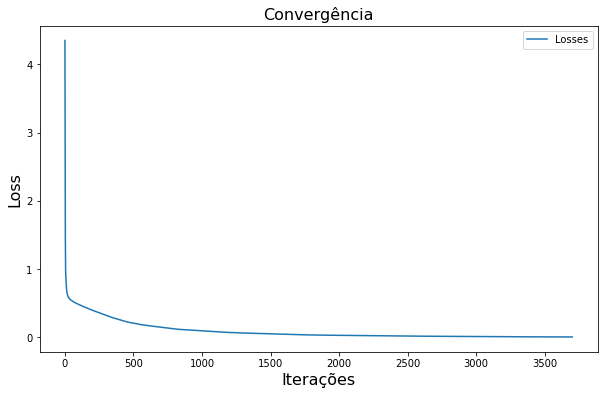

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(losses, label='Losses')
plt.title('Convergência', fontsize=16)
plt.xlabel('Iterações', fontsize=16)
plt.ylabel('Loss', fontsize=16)
plt.title('Convergência', fontsize=16)
plt.legend()
plt.show()

###  Precisão e matriz de confusão (holdout - 75%/25%)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
precisao = accuracy_score(classe_teste, previsoes)
matriz = confusion_matrix(classe_teste, previsoes)
print(matriz)
print('Precisão: {}%'.format(precisao * 100))

[[67  1]
 [ 1 39]]
Precisão: 98.14814814814815%


### **Métricas com os dados da matriz de confusão acima:**
```
[
  [67  1] | 68
  [ 1 39] | 40
  =======
  68  40
]
Precisão: 98.14814814814815%
```
**Parâmetros**	 
---

* Sensibilidade: 98.5%
* Especificidade: 97.5%
* Acurácia: 98.1%
* Correlação de Matthews: 0.96
* Eficiência: 98.0%
* Valor Preditivo Positivo: 98.5%
* Valor Preditivo Negativo: 97.5%


## **EXPLICAÇÕES SOBRE AS MÉTRICAS**
---
**ACURÁCIA**

A proporção de predições corretas, sem levar em consideração o que é positivo e o que é negativo. Esta medida é altamente suscetivel a desbalanceamentos do conjunto de dados e pode facilmente induzir a uma conclusão errada sobre o desempenho do sistema.
```
ACURACIA = TOTAL DE ACERTOS / TOTAL DE DADOS NO CONJUNTO
ACURACIA = (VP + VN) / (P + N)
```
**SENSIBILIDADE**

A proporção de verdadeiros positivos: a capacidade do sistema em predizer corretamente a condição para casos que realmente a têm.

```
SENSIBILIDADE = ACERTOS POSITIVOS / TOTAL DE POSITIVOS
SENSIBILIDADE = VP / (VP + FN)
```

**ESPECIFICIDADE**

A proporção de verdadeiros negativos: a capacidade do sistema em predizer corretamente a ausência da condição para casos que realmente não a têm.
```
ESPECIFICIDADE = ACERTOS NEGATIVOS / TOTAL DE NEGATIVOS
ESPECIFICIDADE = VN / (VN + FP)
```
**EFICIÊNCIA**

A média aritmética da Sensibilidade e Especificidade. Na prática, a sensibilidade e a especificidade variam em direções opostas. Isto é, geralmente, quando um método é muito sensível a positivos, tende a gerar muitos falso-positivos, e vice-versa. Assim, um método de decisão perfeito (100 % de sensibilidade e 100% especificidade) raramente é alcançado, e um balanço entre ambos deve ser atingido.

`EFICIENCIA = (SENS + ESPEC) / 2`

**VALOR PREDITIVO POSITIVO**

A proporção de verdadeiros positivos em relação a todas as predições positivas. Esta medida é altamente suscetivel a desbalanceamentos do conjunto de dados e pode facilmente induzir a uma conclusão errada sobre o desempenho do sistema.
```
VPP = ACERTOS POSITIVOS / TOTAL DE PREDIÇÕES POSITIVAS
VALOR PREDITIVO POSITIVO = VP / (VP + FP)
```

**VALOR PREDITIVO NEGATIVO**

A proporção de verdadeiros negativos em relação a todas as predições negativas. Esta medida é altamente suscetivel a desbalanceamentos do conjunto de dados e pode facilmente induzir a uma conclusão errada sobre o desempenho do sistema.
```
VPN = ACERTOS NEGATIVOS / TOTAL DE PREDIÇÕES NEGATIVAS
VALOR PREDITIVO NEGATIVO = VN / (VN + FN)
```

**COEFICIENTE DE CORRELAÇÃO DE MATTHEWS - COEFICIENTE (PHI)**

O coeficiente de correlação de Matthews é uma medida de qualidade de duas classificações binárias que pode ser usada mesmo se as classes possuem tamanhos bastante diferentes. Retorna um valor entre (-1) e (+1), em que um coeficiente de (+1) representa uma predicao perfeita, (0) representa uma predicao aleatoria media, e (-1) uma predicao inversa. Esta estatistica é equivalente ao coeficiente phi, e tenta, assim como a eficiência, resumir a qualidade da tabela de contingência em um único valor numérico passivel de ser comparado.

`phi = (VP*VN - FP*FN) / sqrt((VP + FP)*(VP + FN)*(VN + FP)*(VN + FN))`

Note que, se qualquer uma das somas no denominador for igual a (0), o denominador pode ser considerado (1), resutando em um phi igual a (0) que seria o limite correto para esta situação.

**REFERÊNCIAS:**

ZHU, W.; ZENG, N.; WANG, N. NESUG 2010 Health Care and Life Sciences Sensitivity , Specificity , Accuracy , Associated Confidence Interval and ROC Analysis with Practical SAS. Life Sciences, p. 1-9, 2010.

PARK, S. H. Receiver Operating Characteristic ( ROC ) Curve : Practical Review. Korean Journal Of Radiology, v. 5, n. March, 2004.

## Avaliando com cross-validation

In [ ]:
from sklearn.model_selection import cross_val_predict

#Usando os valores normalizados
previsores_treinamento, previsores_teste, classe_treinamento, classe_teste = train_test_split(previsores_transformados, classe, test_size=0.25, random_state=42)

classificador2 = MLPClassifier(verbose = True,
                              max_iter=10000,
                              tol = 0.000010,
                              solver = 'adam',
                              hidden_layer_sizes=(100),
                              batch_size=10,
                              learning_rate='constant',
                              learning_rate_init=0.0001,
                              activation='relu')


In [ ]:
#====================================================================
#com cross-validation
#classificação
pred = cross_val_predict(classificador2, previsores_treinamento, classe_treinamento, cv = 10)
#acurácia
precisao_cross = accuracy_score(classe_treinamento, pred)
matriz_cross = confusion_matrix(classe_treinamento, pred)
print(matriz_cross)
print('Precisão: {}%'.format(precisao_cross * 100))

#====================================================================

A saída de streaming foi truncada nas últimas 5000 linhas.
Iteration 1771, loss = 0.15112421
Iteration 1772, loss = 0.15139195
Iteration 1773, loss = 0.15121435
Iteration 1774, loss = 0.15088521
Iteration 1775, loss = 0.15089743
Iteration 1776, loss = 0.15091196
Iteration 1777, loss = 0.15110960
Iteration 1778, loss = 0.15060698
Iteration 1779, loss = 0.15063415
Iteration 1780, loss = 0.15074476
Iteration 1781, loss = 0.15062978
Iteration 1782, loss = 0.15050363
Iteration 1783, loss = 0.15026307
Iteration 1784, loss = 0.15032189
Iteration 1785, loss = 0.15020726
Iteration 1786, loss = 0.15027025
Iteration 1787, loss = 0.15009070
Iteration 1788, loss = 0.15000027
Iteration 1789, loss = 0.15014198
Iteration 1790, loss = 0.14993433
Iteration 1791, loss = 0.15005137
Iteration 1792, loss = 0.15010616
Iteration 1793, loss = 0.14985746
Iteration 1794, loss = 0.14993528
Iteration 1795, loss = 0.14972731
Iteration 1796, loss = 0.14966872
Iteration 1797, loss = 0.14954884
Iteration 1798, loss = 

### Métricas com os dados da matriz de confusão acima (cross-validation):
```
[
  [204   5] | 209
  [ 11 102] | 113
  =======
  215  107  | 322
]
Precisão: 95.03105590062113%
```

**Parâmetros**	 

---
* Sensibilidade	:94.9%
* Especificidade:95.3%
* Acurácia	:95.0%
* Correlação de Matthews	:0.89
* Eficiência	:95.1%
* Valor Preditivo Positivo	: 97.6%
* Valor Preditivo Negativo	:90.3%


[[ 1  5 25 13  5]
 [ 2  5 38 13  5]
 [ 1  5  2  4 11]
 ...
 [ 1 20 25 13  5]
 [ 2 20 38 13  5]
 [ 1 20  2  4 11]]


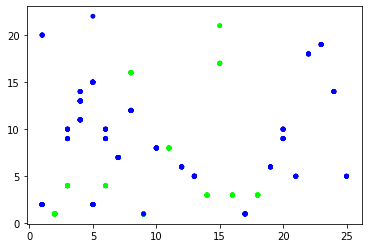

In [ ]:
data = np.asarray(base_nova)
print(data)
plt.scatter(data[:, 3], data[:,4], c=classe, s=15, cmap=plt.cm.brg)

In [ ]:
type(data)

data

array([[ 1,  5, 25, 13,  5],
       [ 2,  5, 38, 13,  5],
       [ 1,  5,  2,  4, 11],
       ...,
       [ 1, 20, 25, 13,  5],
       [ 2, 20, 38, 13,  5],
       [ 1, 20,  2,  4, 11]])

In [ ]:
#base_nova.to_csv('DataSetPoliticas-ENCODE-CATEGORICAL-versao-5.csv')
#base_nova.to_csv(r'C:\Users\Ed\Dropbox\!!! - Mestrado\!!! - UFAC\!! Temas - Dissertacao\Acces Control\Ed\DataSetPoliticas-ENCODE-CATEGORICAL-versao-7.csv', index=False)

In [ ]:
#base_nova.to_csv('DataSetPoliticas-ENCODE-CATEGORICAL-versao-7.csv', index=False)

### ScatterPlot

Text(0.5, 0, 'Objeto')

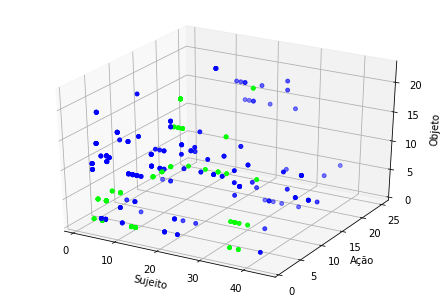

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = Axes3D(fig)

ax.scatter(previsores.Sujeito, previsores.Acao, previsores.Objeto, c=classe, s=15, cmap=plt.cm.brg)
ax.set_xlabel("Sujeito")
ax.set_ylabel("Ação")
ax.set_zlabel("Objeto")

# Redefinindo as bases (novos labels)


*   *Encode*
  *   *base_nova e nova_classe*
  *   *base_encode_completa*
*   Categorical
  * base



In [ ]:
classe

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1,

In [ ]:
nova_classe = pd.DataFrame(data=classe)

nova_classe.columns

#type(nova_classe)

RangeIndex(start=0, stop=1, step=1)

In [ ]:
print(nova_classe)
nova_classe

nova_classe.to_csv('classe-ENCODE.csv', index=False)

     0
0    0
1    0
2    0
3    0
4    0
..  ..
425  0
426  0
427  0
428  0
429  0

[430 rows x 1 columns]


In [ ]:
type(base_nova)

pandas.core.frame.DataFrame

In [ ]:
type(classe)

numpy.ndarray

In [ ]:
classe.shape

(430,)

In [ ]:
base_nova.shape

(430, 5)

In [ ]:
type(nova_classe)

pandas.core.frame.DataFrame

In [ ]:
base_nova

,Acesso,Organizacao,Sujeito,Acao,Objeto
0,1,5,25,13,5
1,2,5,38,13,5
2,1,5,2,4,11
3,2,5,33,4,11
4,1,5,2,8,12
...,...,...,...,...,...
425,2,18,14,4,13
426,1,18,9,23,19
427,1,20,25,13,5
428,2,20,38,13,5


In [ ]:
nova_classe

,0
0,0
1,0
2,0
3,0
4,0
...,...
425,0
426,0
427,0
428,0


In [ ]:
nova_classe.columns = ['Conflito']

In [ ]:
base_nova.columns

Index(['Acesso', 'Organizacao', 'Sujeito', 'Acao', 'Objeto'], dtype='object')

In [ ]:
nova_classe

,Conflito
0,0
1,0
2,0
3,0
4,0
...,...
425,0
426,0
427,0
428,0


In [ ]:
base_nova

,Acesso,Organizacao,Sujeito,Acao,Objeto
0,1,5,25,13,5
1,2,5,38,13,5
2,1,5,2,4,11
3,2,5,33,4,11
4,1,5,2,8,12
...,...,...,...,...,...
425,2,18,14,4,13
426,1,18,9,23,19
427,1,20,25,13,5
428,2,20,38,13,5


In [ ]:
#Juntando os dois dataFrames em um só (o DataFrame ENCODED)
base_encode_completa = base_nova.join(nova_classe)

In [ ]:
base_encode_completa.describe()

,Acesso,Organizacao,Sujeito,Acao,Objeto,Conflito
count,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000
mean,1.479070,8.655814,11.290698,9.102326,7.100000,0.353488
std,0.628224,5.389072,10.741361,6.739491,5.379036,0.478610
min,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,1.000000,4.000000,3.000000,3.000000,2.000000,0.000000
50%,1.000000,8.000000,7.000000,7.000000,6.000000,0.000000
75%,2.000000,13.000000,17.000000,14.000000,11.000000,1.000000
max,3.000000,20.000000,44.000000,25.000000,22.000000,1.000000


In [ ]:
base_encode_completa.head(30)

,Acesso,Organizacao,Sujeito,Acao,Objeto,Conflito
0,1,5,25,13,5,0
1,2,5,38,13,5,0
2,1,5,2,4,11,0
3,2,5,33,4,11,0
4,1,5,2,8,12,0
5,2,5,32,8,12,0
6,1,5,1,4,13,0
7,2,5,33,4,13,0
8,1,5,26,23,19,0
9,1,5,26,15,21,1


In [ ]:
base_encode_completa.size

2580

In [ ]:
base_encode_completa.shape

(430, 6)

In [ ]:
print(base_encode_completa)

     Acesso  Organizacao  Sujeito  Acao  Objeto  Conflito
0         1            5       25    13       5         0
1         2            5       38    13       5         0
2         1            5        2     4      11         0
3         2            5       33     4      11         0
4         1            5        2     8      12         0
..      ...          ...      ...   ...     ...       ...
425       2           18       14     4      13         0
426       1           18        9    23      19         0
427       1           20       25    13       5         0
428       2           20       38    13       5         0
429       1           20        2     4      11         0

[430 rows x 6 columns]


In [ ]:
#Procurando valores nulos
base_encode_completa[obj_df.isnull().any(axis=1)]

,Acesso,Organizacao,Sujeito,Acao,Objeto,Conflito


In [ ]:
#base_encode_completa.to_csv('DataSetPoliticas-ENCODE-COMPLETO-COM-CLASSE-versao-7.csv', index=False)

In [ ]:
train_losses, test_losses =  [], []

# Comparação visual de alguns classificadores 

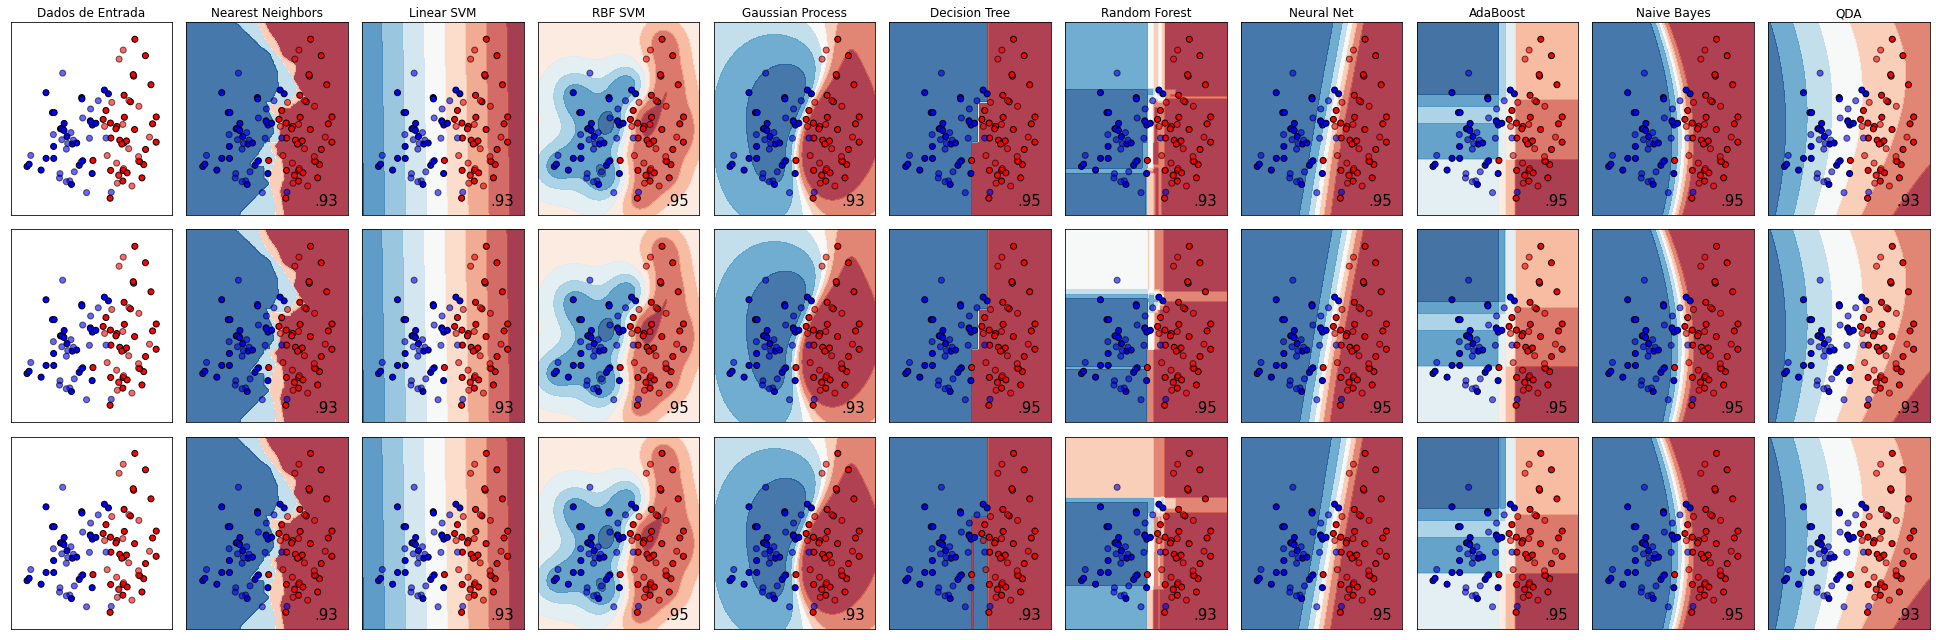

In [ ]:
#Comparação de classificadores
from matplotlib.colors import ListedColormap
from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
h = .02  # step size in the mesh

names = ["Nearest Neighbors", "Linear SVM", "RBF SVM", "Gaussian Process",
         "Decision Tree", "Random Forest", "Neural Net", "AdaBoost",
         "Naive Bayes", "QDA"]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis()]

X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                           random_state=1, n_clusters_per_class=1)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)
datasets = [previsores, classe, linearly_separable]


figure = plt.figure(figsize=(27, 9))
i = 1
# iterando sobre os datasets
for ds_cnt, ds in enumerate(datasets):
    # pre-processamento do dataset, divisão em treinamento e teste
    #X, y = ds
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = \
        train_test_split(X, y, test_size=.4, random_state=42)

    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # apenas plota o dataset primeiro
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    if ds_cnt == 0:
        ax.set_title("Dados de Entrada")
    # Plota os dados de treinamento
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
               edgecolors='k')
    # Plota os dados de teste
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6,
               edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1

    # itera sobre os classificadores
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)

        # Plota o limite de decisão (decision boundary). Para isso, atribui-se uma cor para cada
        # ponto na grade[x_min, x_max]x[y_min, y_max].
        if hasattr(clf, "decision_function"):
            Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        else:
            Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

        # Coloca o resultado em um gráfico colorido
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

        # Plota os dados de treinamento
        ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
                   edgecolors='k')
        # Plota os dados de teste
        ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
                   edgecolors='k', alpha=0.6)

        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        if ds_cnt == 0:
            ax.set_title(name)
        ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
                size=15, horizontalalignment='right')
        i += 1

plt.tight_layout()
plt.show()

In [ ]:
base_nova.shape

(430, 5)

In [ ]:
nova_classe.shape

(430, 1)

In [ ]:
base

,Acesso,Organizacao,Sujeito,Acao,Objeto,Conflito
0,Permitted,UFAC,Secretario_de_Curso_Academico,Abertura,Documentos,0
1,Forbidden,UFAC,Sandra_Maria_Soares_da_Rocha,Abertura,Documentos,0
2,Permitted,UFAC,Outro_Usuario,Solicitar,Produtos,0
3,Forbidden,UFAC,Secretario_de_Centros_Academicos,Solicitar,Produtos,0
4,Permitted,UFAC,Outro_Usuario,Acessar,Almoxarifado,0
...,...,...,...,...,...,...
425,Forbidden,Estácio,Pro_Reitora_Academica,Solicitar,Materiais,0
426,Permitted,Estácio,Setor_Administrativo,Gerar,Planilhas_de_Calculo,0
427,Permitted,UNOPAR,Secretario_de_Curso_Academico,Abertura,Documentos,0
428,Forbidden,UNOPAR,Sandra_Maria_Soares_da_Rocha,Abertura,Documentos,0


In [ ]:
base_encode_completa

,Acesso,Organizacao,Sujeito,Acao,Objeto,Conflito
0,1,5,25,13,5,0
1,2,5,38,13,5,0
2,1,5,2,4,11,0
3,2,5,33,4,11,0
4,1,5,2,8,12,0
...,...,...,...,...,...,...
425,2,18,14,4,13,0
426,1,18,9,23,19,0
427,1,20,25,13,5,0
428,2,20,38,13,5,0


# Naïve Bayes

In [ ]:
base_nova.head()
#base.dtypes

,Acesso,Organizacao,Sujeito,Acao,Objeto
0,1,5,25,13,5
1,2,5,38,13,5
2,1,5,2,4,11
3,2,5,33,4,11
4,1,5,2,8,12


In [ ]:
base_nova.shape

(430, 5)

In [ ]:
nova_classe

,Conflito
0,0
1,0
2,0
3,0
4,0
...,...
425,0
426,0
427,0
428,0


In [ ]:
#previsores = base.iloc[:,0:5].values
#classe = base.iloc[:, 5].values
previsores = base_nova.values
print(previsores)

[[ 1  5 25 13  5]
 [ 2  5 38 13  5]
 [ 1  5  2  4 11]
 ...
 [ 1 20 25 13  5]
 [ 2 20 38 13  5]
 [ 1 20  2  4 11]]


In [ ]:
classe = nova_classe.values
print(classe)

[[0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]


In [ ]:
type(previsores)

numpy.ndarray

## Padronização

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
previsores = scaler.fit_transform(previsores)

## Divisão em treinamento e teste

In [ ]:
from sklearn.model_selection import train_test_split
previsores_treinamento, previsores_teste, classe_treinamento, classe_teste = train_test_split(previsores, classe, test_size=0.25, random_state=0)

In [ ]:
print('Tamanho previsores (treinamento): ' + str(len(previsores_treinamento)))
print('Tamanho previsores (teste): ' + str(len(previsores_teste)))
print('Tamanho classe (treinamento) ' + str(len(classe_treinamento)))
print('Tamanho classe (treinamento) ' + str(len(classe_teste)))

Tamanho previsores (treinamento): 322
Tamanho previsores (teste): 108
Tamanho classe (treinamento) 322
Tamanho classe (treinamento) 108


## Modelo / Treinamento / Previsão e validação

In [ ]:
from sklearn.naive_bayes import GaussianNB
classificador = GaussianNB()
classificador.fit(previsores_treinamento, classe_treinamento)
previsoes = classificador.predict(previsores_teste)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
precisao = accuracy_score(classe_teste, previsoes)
matriz = confusion_matrix(classe_teste, previsoes)

In [ ]:
print(precisao)
print(matriz)

0.7314814814814815
[[65  4]
 [25 14]]


* ### Métricas com os dados da matriz de confusão acima :
```
[
  [65   4] | 69
  [25  14] | 39
  =======
   90  18  | 108
]
Precisão: 73.14814814814815%
```

**Parâmetros**	 

---


* Sensibilidade	: 72.2%
* Especificidade:	77.8%
* Acurácia	    : 73.1%
* Correlação de Matthews: 0.39
* Eficiência	  : 75.0%
* Valor Preditivo Positivo	: 94.2%
* Valor Preditivo Negativo	: 35.9%


# Keras


In [ ]:
#previsores = base_nova.iloc[:,0:5].values
#classe = base_nova.iloc[:, 5].values
previsores = base_nova
classe = nova_classe

In [ ]:
previsores.head(20)

,Acesso,Organizacao,Sujeito,Acao,Objeto
0,1,5,25,13,5
1,2,5,38,13,5
2,1,5,2,4,11
3,2,5,33,4,11
4,1,5,2,8,12
5,2,5,32,8,12
6,1,5,1,4,13
7,2,5,33,4,13
8,1,5,26,23,19
9,1,5,26,15,21


In [ ]:
classe.head(25)

,Conflito
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,1


## Padronização

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
previsores = scaler.fit_transform(previsores)


In [ ]:
previsores

array([[-0.76346582, -0.67916558,  1.27779629,  0.57900729, -0.39085925],
       [ 0.83017643, -0.67916558,  2.48948098,  0.57900729, -0.39085925],
       [-0.76346582, -0.67916558, -0.86595355, -0.75796062,  0.72588146],
       ...,
       [-0.76346582,  2.10748708,  1.27779629,  0.57900729, -0.39085925],
       [ 0.83017643,  2.10748708,  2.48948098,  0.57900729, -0.39085925],
       [-0.76346582,  2.10748708, -0.86595355, -0.75796062,  0.72588146]])

In [ ]:
from sklearn.model_selection import train_test_split
previsores_treinamento, previsores_teste, classe_treinamento, classe_teste = train_test_split(previsores, classe, test_size=0.25, random_state=0)

In [ ]:
print('Tamanho previsores (treinamento): ' + str(len(previsores_treinamento)))
print('Tamanho previsores (teste): ' + str(len(previsores_teste)))
print('Tamanho classe (treinamento) ' + str(len(classe_treinamento)))
print('Tamanho classe (treinamento) ' + str(len(classe_teste)))
print(previsores_treinamento.shape)
print(classe_treinamento.shape)
print(previsores_teste.shape)
print(classe_teste.shape)

Tamanho previsores (treinamento): 322
Tamanho previsores (teste): 108
Tamanho classe (treinamento) 322
Tamanho classe (treinamento) 108
(322, 5)
(322, 1)
(108, 5)
(108, 1)


In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense

## Modelo

In [ ]:
classificador = Sequential()
classificador.add(Dense(units = 5, activation = 'relu', input_dim = 5))
classificador.add(Dense(units = 32, activation = 'relu'))
classificador.add(Dense(units = 1, activation = 'sigmoid'))
classificador.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])


### Treinamento

In [ ]:
classificador.fit(previsores_treinamento, classe_treinamento, batch_size = 10, epochs = 500)

Epoch 1/500
33/33 [==============================] - 1s 977us/step - loss: 0.6356 - accuracy: 0.6411
Epoch 2/500
33/33 [==============================] - 0s 1ms/step - loss: 0.6101 - accuracy: 0.6867
Epoch 3/500
33/33 [==============================] - 0s 972us/step - loss: 0.6115 - accuracy: 0.6863
Epoch 4/500
33/33 [==============================] - 0s 923us/step - loss: 0.6021 - accuracy: 0.7514
Epoch 5/500
33/33 [==============================] - 0s 905us/step - loss: 0.5525 - accuracy: 0.7609
Epoch 6/500
33/33 [==============================] - 0s 966us/step - loss: 0.5444 - accuracy: 0.7481
Epoch 7/500
33/33 [==============================] - 0s 986us/step - loss: 0.5355 - accuracy: 0.7570
Epoch 8/500
33/33 [==============================] - 0s 900us/step - loss: 0.5477 - accuracy: 0.7612
Epoch 9/500
33/33 [==============================] - 0s 1ms/step - loss: 0.5010 - accuracy: 0.7786
Epoch 10/500
33/33 [==============================] - 0s 926us/step - loss: 0.5792 - accuracy: 

### Previsão

In [ ]:
previsoes = classificador.predict(previsores_teste)
previsoes = (previsoes > 0.5)

### Métricas

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
precisao = accuracy_score(classe_teste, previsoes)
matriz = confusion_matrix(classe_teste, previsoes)

In [ ]:
print('Precisão: {}%'.format(precisao * 100))
print('Matriz de confusão: ')
print(matriz)

Precisão: 96.29629629629629%
Matriz de confusão: 
[[65  3]
 [ 1 39]]


### **Métricas com os dados da matriz de confusão acima :**
```
[
  [65   3] | 68
  [1   39] | 40
  =======
   66  42  | 108
]
Precisão: 96.29629629629629%
```
**Parâmetros**	 
---


* Sensibilidade	: 98.5%
* Especificidade	: 92.9%
* Acurácia	: 96.3%
* Correlação de Matthews	: 0.92
* Eficiência	: 95.7%
* Valor Preditivo Positivo	: 95.6%
* Valor Preditivo Negativo	: 97.5%


# KNN


In [ ]:
base_nova.shape

(430, 5)

In [ ]:
nova_classe.shape

(430, 1)

In [ ]:
previsores = base_nova
print(previsores)
print(type(previsores))

     Acesso  Organizacao  Sujeito  Acao  Objeto
0         1            5       25    13       5
1         2            5       38    13       5
2         1            5        2     4      11
3         2            5       33     4      11
4         1            5        2     8      12
..      ...          ...      ...   ...     ...
425       2           18       14     4      13
426       1           18        9    23      19
427       1           20       25    13       5
428       2           20       38    13       5
429       1           20        2     4      11

[430 rows x 5 columns]
<class 'pandas.core.frame.DataFrame'>


In [ ]:
classe = nova_classe
print(classe)
print(type(classe))

     Conflito
0           0
1           0
2           0
3           0
4           0
..        ...
425         0
426         0
427         0
428         0
429         0

[430 rows x 1 columns]
<class 'pandas.core.frame.DataFrame'>


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
previsores = scaler.fit_transform(previsores)

In [ ]:
from sklearn.model_selection import train_test_split
previsores_treinamento, previsores_teste, classe_treinamento, classe_teste = train_test_split(previsores, classe, test_size=0.25, random_state=0)

In [ ]:
print('Tamanho previsores (treinamento): ' + str(len(previsores_treinamento)))
print('Tamanho previsores (teste): ' + str(len(previsores_teste)))
print('Tamanho classe (treinamento) ' + str(len(classe_treinamento)))
print('Tamanho classe (treinamento) ' + str(len(classe_teste)))
print(previsores_treinamento.shape)
print(classe_treinamento.shape)
print(previsores_teste.shape)
print(classe_teste.shape)


Tamanho previsores (treinamento): 322
Tamanho previsores (teste): 108
Tamanho classe (treinamento) 322
Tamanho classe (treinamento) 108
(322, 5)
(322, 1)
(108, 5)
(108, 1)


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classificador = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p = 2)
classificador.fit(previsores_treinamento, classe_treinamento)
previsoes = classificador.predict(previsores_teste)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
precisao = accuracy_score(classe_teste, previsoes)
matriz = confusion_matrix(classe_teste, previsoes)

In [ ]:
print('Precisão: {}%'.format(precisao * 100))
print('Matriz de confusão: ')
print(matriz)

Precisão: 87.96296296296296%
Matriz de confusão: 
[[61  7]
 [ 6 34]]


### **Métricas com os dados da matriz de confusão acima :**
```
[
  [61   7] | 68
  [6   34] | 40
  =======
   67  4  | 108
]
Precisão: 87.96296296296296%
```
**Parâmetros**	 
---
* Sensibilidade	: 91.0%
* Especificidade	: 82.9%
* Acurácia	: 88.0%
* Correlação de Matthews	: 0.74
* Eficiência	: 87.0%
* Valor Preditivo Positivo	: 89.7%
* Valor Preditivo Negativo	: 85.0%


In [ ]:
import collections
collections.Counter(classe_teste)

Counter({'Conflito': 1})

# **SVM**

In [ ]:
base_teste = base

In [ ]:
base

,Acesso,Organizacao,Sujeito,Acao,Objeto,Conflito
0,Permitted,UFAC,Secretario_de_Curso_Academico,Abertura,Documentos,0
1,Forbidden,UFAC,Sandra_Maria_Soares_da_Rocha,Abertura,Documentos,0
2,Permitted,UFAC,Outro_Usuario,Solicitar,Produtos,0
3,Forbidden,UFAC,Secretario_de_Centros_Academicos,Solicitar,Produtos,0
4,Permitted,UFAC,Outro_Usuario,Acessar,Almoxarifado,0
...,...,...,...,...,...,...
425,Forbidden,Estácio,Pro_Reitora_Academica,Solicitar,Materiais,0
426,Permitted,Estácio,Setor_Administrativo,Gerar,Planilhas_de_Calculo,0
427,Permitted,UNOPAR,Secretario_de_Curso_Academico,Abertura,Documentos,0
428,Forbidden,UNOPAR,Sandra_Maria_Soares_da_Rocha,Abertura,Documentos,0


In [ ]:
previsores = base.iloc[:,0:5].values
previsores
type(previsores)
#print(previsores)
classe = base.iloc[:, 5].values

In [ ]:
previsores

array([['Permitted', 'UFAC', 'Secretario_de_Curso_Academico', 'Abertura',
        'Documentos'],
       ['Forbidden', 'UFAC', 'Sandra_Maria_Soares_da_Rocha', 'Abertura',
        'Documentos'],
       ['Permitted', 'UFAC', 'Outro_Usuario', 'Solicitar', 'Produtos'],
       ...,
       ['Permitted', 'UNOPAR', 'Secretario_de_Curso_Academico',
        'Abertura', 'Documentos'],
       ['Forbidden', 'UNOPAR', 'Sandra_Maria_Soares_da_Rocha',
        'Abertura', 'Documentos'],
       ['Permitted', 'UNOPAR', 'Outro_Usuario', 'Solicitar', 'Produtos']],
      dtype=object)

In [ ]:
classe

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1,

##   Classe para multiencoder automático 

(usando a classe LabelEncoder do sklearn)

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline

# Cria alguns dados de teste em um dataframe Pandas 
# fruit_data = pd.DataFrame({
#                             'fruta': ['maçã', 'laranja', 'pêra', 'laranja'],
#                             'cor': ['vermelho', 'laranja', 'verde', 'verde'],
#                             'peso': [5,6,3,4]
#})

class MultiColumnLabelEncoder:
    def __init__(self,columns = None):
        self.columns = columns # matriz de nomes de coluna para encode

    def fit(self,X,y=None):
        return self # não é relevante aqui

    def transform(self,X):
        '''
        Transforma colunas de X especificadas em self.columns usando
        LabelEncoder (). Se nenhuma coluna for especificada, transforma todos
        colunas em X.
        '''
        output = X.copy()
        if self.columns is not None:
            for col in self.columns:
                output[col] = LabelEncoder().fit_transform(output[col])
        else:
            for colname,col in output.iteritems():
                output[colname] = LabelEncoder().fit_transform(col)
        return output

    def fit_transform(self,X,y=None):
        return self.fit(X,y).transform(X)

In [ ]:
base_encode = MultiColumnLabelEncoder(columns = ['Acesso', 'Organizacao', 'Sujeito', 'Acao', 'Objeto']).fit_transform(base_teste)


In [ ]:
base_encode

,Acesso,Organizacao,Sujeito,Acao,Objeto,Conflito
0,2,10,34,0,7,0
1,0,10,32,0,7,0
2,2,10,25,23,20,0
3,0,10,33,23,20,0
4,2,10,25,2,0,0
...,...,...,...,...,...,...
425,0,6,28,23,11,0
426,2,6,38,13,15,0
427,2,13,34,0,7,0
428,0,13,32,0,7,0


In [ ]:
base_encode.dtypes

Acesso         int64
Organizacao    int64
Sujeito        int64
Acao           int64
Objeto         int64
Conflito       int64
dtype: object

In [ ]:
base_nova

,Acesso,Organizacao,Sujeito,Acao,Objeto
0,1,5,25,13,5
1,2,5,38,13,5
2,1,5,2,4,11
3,2,5,33,4,11
4,1,5,2,8,12
...,...,...,...,...,...
425,2,18,14,4,13
426,1,18,9,23,19
427,1,20,25,13,5
428,2,20,38,13,5


In [ ]:
nova_classe.head(25)

,Conflito
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,1


In [ ]:
#previsores = base_encode.iloc[:,0:5].values
#previsores
#type(previsores)
#print(previsores)
#classe = base_encode.iloc[:, 5].values
#==============================================
previsores = base_nova
classe = nova_classe


In [ ]:
classe.head(25)

,Conflito
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,1


In [ ]:
previsores

,Acesso,Organizacao,Sujeito,Acao,Objeto
0,1,5,25,13,5
1,2,5,38,13,5
2,1,5,2,4,11
3,2,5,33,4,11
4,1,5,2,8,12
...,...,...,...,...,...
425,2,18,14,4,13
426,1,18,9,23,19
427,1,20,25,13,5
428,2,20,38,13,5


In [ ]:
#Normalização
#from sklearn.preprocessing import Normalizer
#normalizador = Normalizer()
#previsores = normalizador.fit_transform(previsores)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
previsores = scaler.fit_transform(previsores)

In [ ]:
previsores

array([[-0.76346582, -0.67916558,  1.27779629,  0.57900729, -0.39085925],
       [ 0.83017643, -0.67916558,  2.48948098,  0.57900729, -0.39085925],
       [-0.76346582, -0.67916558, -0.86595355, -0.75796062,  0.72588146],
       ...,
       [-0.76346582,  2.10748708,  1.27779629,  0.57900729, -0.39085925],
       [ 0.83017643,  2.10748708,  2.48948098,  0.57900729, -0.39085925],
       [-0.76346582,  2.10748708, -0.86595355, -0.75796062,  0.72588146]])

In [ ]:
from sklearn.model_selection import train_test_split
previsores_treinamento, previsores_teste, classe_treinamento, classe_teste = train_test_split(previsores, classe, test_size=0.25, random_state=0)

In [ ]:
print('Tamanho previsores (treinamento): ' + str(len(previsores_treinamento)))
print('Tamanho previsores (teste): ' + str(len(previsores_teste)))
print('Tamanho classe (treinamento) ' + str(len(classe_treinamento)))
print('Tamanho classe (treinamento) ' + str(len(classe_teste)))
print(previsores_treinamento.shape)
print(classe_treinamento.shape)
print(previsores_teste.shape)
print(classe_teste.shape)


Tamanho previsores (treinamento): 322
Tamanho previsores (teste): 108
Tamanho classe (treinamento) 322
Tamanho classe (treinamento) 108
(322, 5)
(322, 1)
(108, 5)
(108, 1)


In [ ]:
#from sklearn.svm import SVC
#classificador = SVC(kernel = 'linear', random_state = 1, 
#                    C=1, tol=0.000001, verbose=True, decision_function_shape='ovo',
#                    cache_size=40, degree=3, gamma='auto', shrinking=True
#                    )
#classificador = SVC(kernel = 'linear', random_state = 1, C=1, tol=0.000001, verbose=True, decision_function_shape='ovo')

from sklearn.svm import LinearSVC
classificador = LinearSVC(random_state = 1, C=1, tol=0.000001, verbose=1, max_iter=10000, penalty='l2')
print(classificador)



LinearSVC(C=1, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=10000,
          multi_class='ovr', penalty='l2', random_state=1, tol=1e-06,
          verbose=1)


In [ ]:
classificador.fit(previsores_treinamento, classe_treinamento)

[LibLinear]

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LinearSVC(C=1, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=10000,
          multi_class='ovr', penalty='l2', random_state=1, tol=1e-06,
          verbose=1)

In [ ]:
previsoes = classificador.predict(previsores_teste)

from sklearn.metrics import confusion_matrix, accuracy_score
precisao = accuracy_score(classe_teste, previsoes)
matriz = confusion_matrix(classe_teste, previsoes)

In [ ]:
print('Precisão: {}%'.format(precisao * 100))
print('Matriz de confusão: ')
print(matriz)

import collections
collections.Counter(classe_teste)

Precisão: 80.55555555555556%
Matriz de confusão: 
[[65  3]
 [18 22]]


Counter({'Conflito': 1})

### **Métricas com os dados da matriz de confusão acima :**
```
[
  [63   5] | 68
  [16  24] | 40
  =======
   79  29  | 108
]
Precisão: 80.55555555555556%
```
**Parâmetros**	 
---
* Sensibilidade	: 79.7%
* Especificidade	: 82.8%
* Acurácia	: 80.6%
* Correlação de Matthews	: 0.57
* Eficiência	: 81.3%
* Valor Preditivo Positivo	: 92.6%
* Valor Preditivo Negativo	: 60.0%


# Random Forest

In [ ]:
previsores = base_nova

In [ ]:
classe = nova_classe

In [ ]:
base

,Acesso,Organizacao,Sujeito,Acao,Objeto,Conflito
0,Permitted,UFAC,Secretario_de_Curso_Academico,Abertura,Documentos,0
1,Forbidden,UFAC,Sandra_Maria_Soares_da_Rocha,Abertura,Documentos,0
2,Permitted,UFAC,Outro_Usuario,Solicitar,Produtos,0
3,Forbidden,UFAC,Secretario_de_Centros_Academicos,Solicitar,Produtos,0
4,Permitted,UFAC,Outro_Usuario,Acessar,Almoxarifado,0
...,...,...,...,...,...,...
425,Forbidden,Estácio,Pro_Reitora_Academica,Solicitar,Materiais,0
426,Permitted,Estácio,Setor_Administrativo,Gerar,Planilhas_de_Calculo,0
427,Permitted,UNOPAR,Secretario_de_Curso_Academico,Abertura,Documentos,0
428,Forbidden,UNOPAR,Sandra_Maria_Soares_da_Rocha,Abertura,Documentos,0


In [ ]:
#previsores = base.iloc[:,0:5].values
#previsores
#type(previsores)
#print(previsores)
#classe = base.iloc[:, 5].values
previsores = base_nova
classe = nova_classe

In [ ]:
previsores

,Acesso,Organizacao,Sujeito,Acao,Objeto
0,1,5,25,13,5
1,2,5,38,13,5
2,1,5,2,4,11
3,2,5,33,4,11
4,1,5,2,8,12
...,...,...,...,...,...
425,2,18,14,4,13
426,1,18,9,23,19
427,1,20,25,13,5
428,2,20,38,13,5


In [ ]:
classe

,Conflito
0,0
1,0
2,0
3,0
4,0
...,...
425,0
426,0
427,0
428,0


In [ ]:
from sklearn.model_selection import train_test_split
previsores_treinamento, previsores_teste, classe_treinamento, classe_teste = train_test_split(previsores, classe, test_size=0.25, random_state=0)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
classificador = RandomForestClassifier(n_estimators=40, criterion='entropy', random_state=0)
classificador.fit(previsores_treinamento, classe_treinamento)
previsoes = classificador.predict(previsores_teste)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
precisao = accuracy_score(classe_teste, previsoes)
matriz = confusion_matrix(classe_teste, previsoes)

In [ ]:
print('Precisão: {}%'.format(precisao * 100))
print('Matriz de confusão: ')
print(matriz)

import collections
collections.Counter(classe_teste)

Precisão: 99.07407407407408%
Matriz de confusão: 
[[67  1]
 [ 0 40]]


Counter({'Conflito': 1})

### **Métricas com os dados da matriz de confusão acima :**
```
[
  [67   1] | 68
  [0   40] | 40
  =======
   67  41  | 108
]
Precisão: 99.07407407407407%
```
**Parâmetros**	 
---
* Sensibilidade: 100.0%
* Especificidade: 97.6%
* Acurácia	: 99.1%
* Correlação de Matthews	: 0.98
* Eficiência	: 98.8%
* Valor Preditivo Positivo	: 98.5%
* Valor Preditivo Negativo	: 100.0%


## **Função ManualEncoder(data_frame)**

A função faz o *encode* do dataset automaticamente usando os critérios anteriores

In [ ]:
def ManualEnconder(data_frame):    
    #Usando dicionarios para trocar os valores das colunas

    acesso = {"Acesso": {"Permitted":1, "Forbidden": 2, "Obliged": 3}}
    data_frame.replace(acesso, inplace=True)

    organizacao = {"Organizacao": 
                    {"Unidade_Administrativa":1,
                        "IFAC":2,
                        "Uninorte":3,
                        "FAMETA":4,
                        "UFAC":5,
                        "Administrative_Unit":6,
                        "CFET":7,
                        "Comite_Etica_Em_Pesquisa":8,
                        "CPA":9,
                        "CCET":10,
                        "CCSJA":11,
                        "UNIMETA":12,
                        "IFAC":13,
                        "FAAO":14,
                        "Unidade_Gerencial":15,
                        "Unidade_Executiva":16,
                        "Unidade_Financeira":17,
                        "Estácio":18,
                        "UNIASSELVI":19,
                        "UNOPAR":20                    
                    }
                }
    data_frame.replace(organizacao, inplace=True)

    sujeito = {"Sujeito": 
                {
                    "Secretarios":1,"Outro_Usuario":2,"Usuario_Qualquer":3,"Usuario_Terceirizado":4,
                    "Professor":5,"Coordenador":6,"Grupo_Almoxarifado":7,"Joao_Calvino":8,"Setor_Administrativo":9,
                    "Francisco_Jose_Souza":10,"Estagiario3":11,"Estagiario1":12,"Secretario_de_Unidade_Administrativa":13,
                    "Pro_Reitora_Academica":14,"Joana_Siqueira":15,"Raimunda_Souza":16,"Aline_Moreira":17,"Joao_Paulo":18,
                    "Joao_Josino":19,"Raimundo_Nonato":20,"Socorro_Pontes":21,"Francisco_Mendes":22,"Jose_Rodrigues_Bardalles":23,
                    "Marcos_Pontes":24,"Secretario_de_Curso_Academico":25,"Grupo_IPTU":26,"Vanessa_Lima":27,"Vanessa_Souza":28,
                    "Ana_Ester":29,"Italo_Calvino":30,"Marcos_Ponte":31,"Jaider_Moreira_de_Almeida":32,"Secretario_de_Centros_Academicos":33,
                    "PROTOCOLIZADOR1":34,"Maria_Das_Dores":35,"PROTOCOLIZADOR3":36,"Secretario_e_Unidade_Administrativa":37,
                    "Sandra_Maria_Soares_da_Rocha":38,"Marcos_Ponts":39,"Francisco_Carlos":40,"Janaina_Souza":41,"FranciscoJose_Souza":42,
                    "Eliana_Maria_de_Souza":43,"Jorge_Jesus":44}
                }
    data_frame.replace(sujeito, inplace=True)

    acao = {"Acao": 
                {
                    "Solicitacao":1,
                    "Acess":2, "Record":3, "Solicitar":4, "Analise":5, "Create":6, "Requisitar":7,
                    "Acessar":8, "Open":9, "VoltarLancamento":10, "LancarMedia":11, "Inserir":12,
                    "Abertura":13, "Cadastrar":14, "Calcular":15, "Nova":16, "Generate":17, "Alterar":18,
                    "Criar":19, "Close":20, "SolicitacaoAbertura":21, "Matricular":22, "Gerar":23, "Efetivar":24,
                    "Cancelamento":25}
                }
    data_frame.replace(acao, inplace=True)

    objeto = {"Objeto": 
                {
                    "Process":1, "Central_de_Copias":2, "Convencao":3, "ProcNURCADesp":4,
                    "Documentos":5, "Guia_de_Requisicao":6,                    "Material":7,
                    "Notas":8, "ProcessDispatch":9,
                    "BuildDispatch":10, "Produtos":11,
                    "Almoxarifado":12, "Materiais":13,
                    "MatriculaAluno":14, "Central_de_Copias_Analise":15,
                    "Portal_do_Aluno":16, "FGTS":17,
                    "Aluno":18, "Planilhas_de_Calculo":19,
                    "Biblioteca":20, "IPTU":21,
                    "entral_de_Copias":22
                }
            }
    data_frame.replace(objeto, inplace=True)

# Teste da classificação com instâncias aleatórias

Essas instâncias abaixo foram geradas pelo programa [`geracao_politicas.py`](https://gist.github.com/ed1rac/f67760fbea4bde73bcbdcbf5cafc9eaf)


In [ ]:
politicas_teste = [
                    'Obliged', 'UFAC', 'Secretario_de_Curso_Academico', 'Acessar', 'Produtos',
                    'Permitted', 'UFAC', 'Secretario_de_Curso_Academico', 'Acessar', 'Documentos',
                    'Obliged', 'CCSJA', 'Outro_Usuario', 'Abertura', 'Almoxarifado'
                   ]



In [ ]:
politicas_teste

['Obliged',
 'UFAC',
 'Secretario_de_Curso_Academico',
 'Acessar',
 'Produtos',
 'Permitted',
 'UFAC',
 'Secretario_de_Curso_Academico',
 'Acessar',
 'Documentos',
 'Obliged',
 'CCSJA',
 'Outro_Usuario',
 'Abertura',
 'Almoxarifado']

In [ ]:
policies_test = pd.DataFrame(np.array(politicas_teste).reshape(3,5), columns = list("ABCDE"))

In [ ]:
policies_test.columns = ['Acesso', 'Organizacao', 'Sujeito', 'Acao', 'Objeto']

In [ ]:
policies_test

,Acesso,Organizacao,Sujeito,Acao,Objeto
0,Obliged,UFAC,Secretario_de_Curso_Academico,Acessar,Produtos
1,Permitted,UFAC,Secretario_de_Curso_Academico,Acessar,Documentos
2,Obliged,CCSJA,Outro_Usuario,Abertura,Almoxarifado


In [ ]:
ManualEnconder(policies_test)

In [ ]:
policies_test

,Acesso,Organizacao,Sujeito,Acao,Objeto
0,3,5,25,8,11
1,1,5,25,8,5
2,3,11,2,13,12


In [ ]:
base

,Acesso,Organizacao,Sujeito,Acao,Objeto,Conflito
0,Permitted,UFAC,Secretario_de_Curso_Academico,Abertura,Documentos,0
1,Forbidden,UFAC,Sandra_Maria_Soares_da_Rocha,Abertura,Documentos,0
2,Permitted,UFAC,Outro_Usuario,Solicitar,Produtos,0
3,Forbidden,UFAC,Secretario_de_Centros_Academicos,Solicitar,Produtos,0
4,Permitted,UFAC,Outro_Usuario,Acessar,Almoxarifado,0
...,...,...,...,...,...,...
425,Forbidden,Estácio,Pro_Reitora_Academica,Solicitar,Materiais,0
426,Permitted,Estácio,Setor_Administrativo,Gerar,Planilhas_de_Calculo,0
427,Permitted,UNOPAR,Secretario_de_Curso_Academico,Abertura,Documentos,0
428,Forbidden,UNOPAR,Sandra_Maria_Soares_da_Rocha,Abertura,Documentos,0


In [ ]:
pt = pd.DataFrame(np.array(politicas_teste).reshape(3,5), columns = ['Acesso', 'Organizacao', 'Sujeito', 'Acao', 'Objeto'])
dados = base

In [ ]:
#dados.query("Sujeito=='Secretario_de_Curso_Academico' & Organizacao=='UFAC'")
dados.query("Sujeito=='Secretario_de_Curso_Academico'")

,Acesso,Organizacao,Sujeito,Acao,Objeto,Conflito
0,Permitted,UFAC,Secretario_de_Curso_Academico,Abertura,Documentos,0
68,Permitted,Uninorte,Secretario_de_Curso_Academico,Abertura,Documentos,0
139,Permitted,FAMETA,Secretario_de_Curso_Academico,Abertura,Documentos,0
210,Permitted,IFAC,Secretario_de_Curso_Academico,Abertura,Documentos,0
281,Permitted,UNIMETA,Secretario_de_Curso_Academico,Abertura,Documentos,0
343,Permitted,FAAO,Secretario_de_Curso_Academico,Abertura,Documentos,0
365,Permitted,Estácio,Secretario_de_Curso_Academico,Abertura,Documentos,0
427,Permitted,UNOPAR,Secretario_de_Curso_Academico,Abertura,Documentos,0


In [ ]:
pt

,Acesso,Organizacao,Sujeito,Acao,Objeto
0,Obliged,UFAC,Secretario_de_Curso_Academico,Acessar,Produtos
1,Permitted,UFAC,Secretario_de_Curso_Academico,Acessar,Documentos
2,Obliged,CCSJA,Outro_Usuario,Abertura,Almoxarifado


In [ ]:
dados.query("Sujeito=='Secretario_de_Curso_Academico' & Organizacao=='UFAC'")

,Acesso,Organizacao,Sujeito,Acao,Objeto,Conflito
0,Permitted,UFAC,Secretario_de_Curso_Academico,Abertura,Documentos,0


In [ ]:
dados.query("Sujeito=='Secretario_de_Curso_Academico' & Objeto=='Produtos'")

,Acesso,Organizacao,Sujeito,Acao,Objeto,Conflito


In [ ]:
dados.query("Organizacao=='CCSJA'")

,Acesso,Organizacao,Sujeito,Acao,Objeto,Conflito
16,Permitted,CCSJA,Jose_Rodrigues_Bardalles,Analise,Central_de_Copias,0
54,Permitted,CCSJA,Joao_Paulo,Analise,Central_de_Copias,0
63,Permitted,CCSJA,Professor,Analise,Central_de_Copias,0


In [ ]:
dados.query("Organizacao=='CCSJA' & Sujeito=='Outro_Usuario'")

,Acesso,Organizacao,Sujeito,Acao,Objeto,Conflito


In [ ]:
classificao_teste_correta = [0,0,0] #Sem conflito para nenhuma instância


In [ ]:
classificador

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=40,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [ ]:
#classificador.fit(previsores_treinamento, classe_treinamento)
predicao_teste = classificador.predict(policies_test)


In [ ]:
predicao_teste

array([0, 0, 0])

In [ ]:
def compara_predicoes(predicao, corretas):
  for i,valor in enumerate(predicao):
    if predicao[i]==corretas[i]:
      print('Classificação correta para a instância {} que é {}'.format(i, valor))
    else:
      print('Classificação incorreta para a instância {} que é {}'.format(i, valor))

In [ ]:
compara_predicoes(predicao_teste,classificao_teste_correta)

Classificação correta para a instância 0 que é 0
Classificação correta para a instância 1 que é 0
Classificação correta para a instância 2 que é 0


# Árvore de decisão


In [ ]:
previsores

,Acesso,Organizacao,Sujeito,Acao,Objeto
0,1,5,25,13,5
1,2,5,38,13,5
2,1,5,2,4,11
3,2,5,33,4,11
4,1,5,2,8,12
...,...,...,...,...,...
425,2,18,14,4,13
426,1,18,9,23,19
427,1,20,25,13,5
428,2,20,38,13,5


In [ ]:
classe

,Conflito
0,0
1,0
2,0
3,0
4,0
...,...
425,0
426,0
427,0
428,0


In [ ]:
#selecionando da base a parte do dataset que está com os tipos object
#df = base.select_dtypes(include=['object']).copy()
#df.head()
#base.dtypes
#previsores = dados.select_dtypes(include=['object']).copy()
#classe = base.iloc[:, 5].values
previsores = base_nova
classe = nova_classe

In [ ]:
previsores

,Acesso,Organizacao,Sujeito,Acao,Objeto
0,1,5,25,13,5
1,2,5,38,13,5
2,1,5,2,4,11
3,2,5,33,4,11
4,1,5,2,8,12
...,...,...,...,...,...
425,2,18,14,4,13
426,1,18,9,23,19
427,1,20,25,13,5
428,2,20,38,13,5


In [ ]:
previsores

,Acesso,Organizacao,Sujeito,Acao,Objeto
0,Permitted,UFAC,Secretario_de_Curso_Academico,Abertura,Documentos
1,Forbidden,UFAC,Sandra_Maria_Soares_da_Rocha,Abertura,Documentos
2,Permitted,UFAC,Outro_Usuario,Solicitar,Produtos
3,Forbidden,UFAC,Secretario_de_Centros_Academicos,Solicitar,Produtos
4,Permitted,UFAC,Outro_Usuario,Acessar,Almoxarifado
...,...,...,...,...,...
425,Forbidden,Estácio,Pro_Reitora_Academica,Solicitar,Materiais
426,Permitted,Estácio,Setor_Administrativo,Gerar,Planilhas_de_Calculo
427,Permitted,UNOPAR,Secretario_de_Curso_Academico,Abertura,Documentos
428,Forbidden,UNOPAR,Sandra_Maria_Soares_da_Rocha,Abertura,Documentos


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
previsores = scaler.fit_transform(previsores)

In [ ]:
from sklearn.model_selection import train_test_split
previsores_treinamento, previsores_teste, classe_treinamento, classe_teste = train_test_split(previsores, classe, test_size=0.25, random_state=0)

In [ ]:
# Modelo
from sklearn.tree import DecisionTreeClassifier
classificador = DecisionTreeClassifier(criterion='entropy', random_state=0)
classificador.fit(previsores_treinamento, classe_treinamento)
previsoes = classificador.predict(previsores_teste)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
precisao = accuracy_score(classe_teste, previsoes)
matriz = confusion_matrix(classe_teste, previsoes)

In [ ]:
print('Precisão: {}%'.format(precisao * 100))
print('Matriz de confusão: ')
print(matriz)

import collections
collections.Counter(classe_teste)

Precisão: 99.07407407407408%
Matriz de confusão: 
[[67  1]
 [ 0 40]]


Counter({'Conflito': 1})

In [ ]:
from sklearn import metrics
print(metrics.classification_report(classe_teste,previsoes))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99        68
           1       0.98      1.00      0.99        40

    accuracy                           0.99       108
   macro avg       0.99      0.99      0.99       108
weighted avg       0.99      0.99      0.99       108



In [ ]:
#!pip install graphviz==0.9
#!pip install pydot

!apt-get install graphviz

Reading package lists... Done
Building dependency tree       
Reading state information... Done
graphviz is already the newest version (2.40.1-2).
0 upgraded, 0 newly installed, 0 to remove and 16 not upgraded.


In [ ]:
prev_treinamento = pd.DataFrame(data=previsores_treinamento, columns=['Acesso', 'Organizacao', 'Sujeito', 'Acao', 'Objeto'])

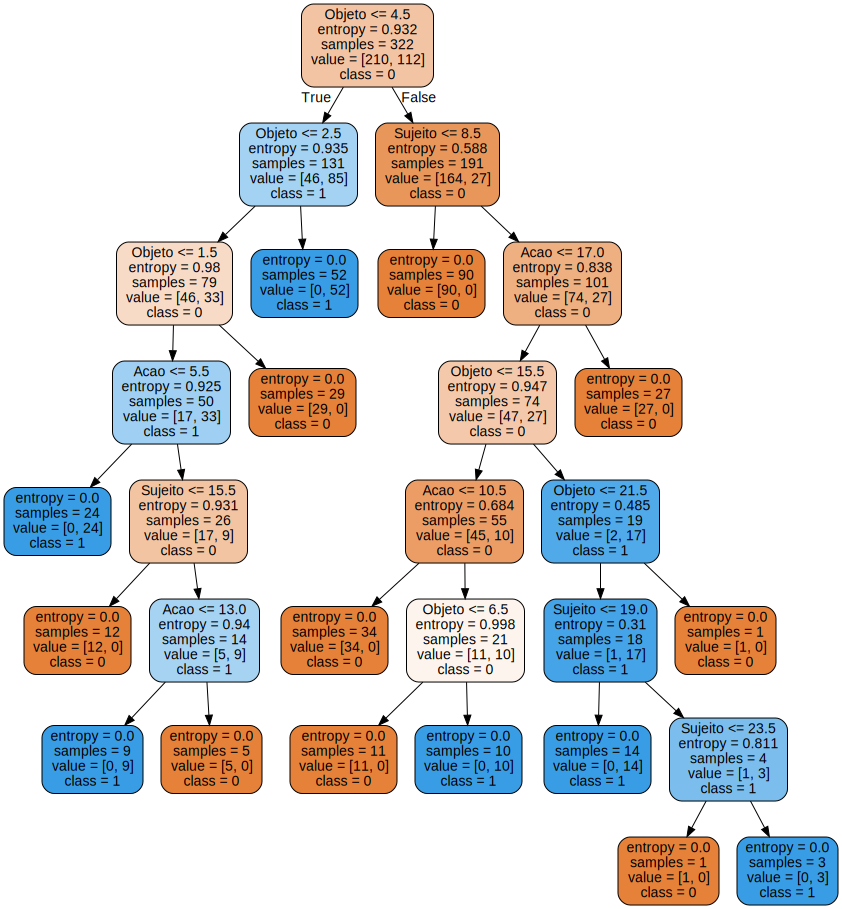

In [ ]:
from sklearn.tree import export_graphviz
import graphviz

classificador.fit(previsores_treinamento, classe_treinamento)
features = prev_treinamento.columns
dot_data = export_graphviz(classificador, out_file=None, filled=True, rounded=True, 
                class_names=["0", "1"], 
                feature_names =  features)

graph = graphviz.Source(dot_data)
graph

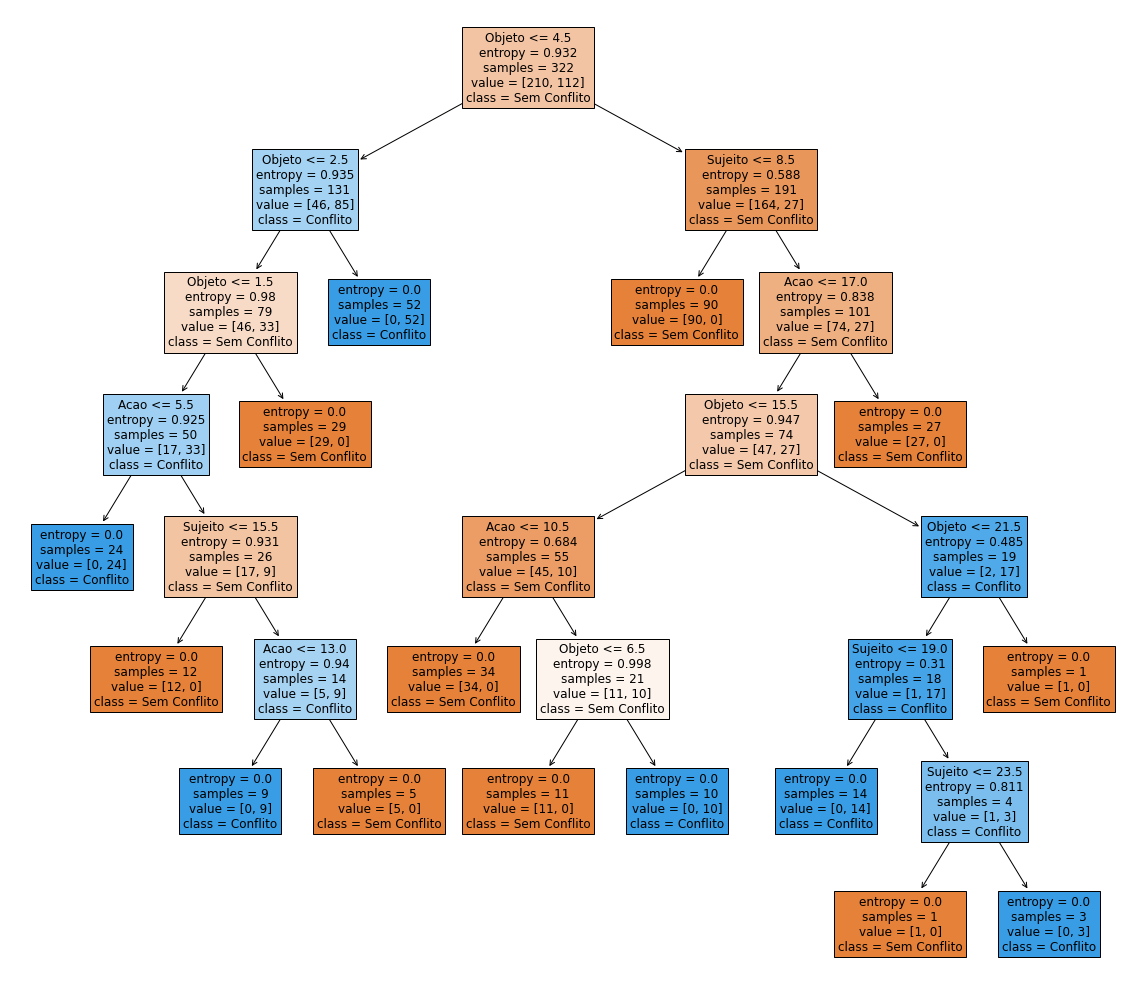

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(20,18))
a = plot_tree(classificador, feature_names=prev_treinamento.columns, fontsize=12,
filled=True,
class_names=['Sem Conflito', 'Conflito'])

In [ ]:
from sklearn.tree.export import export_text
r = export_text(classificador, feature_names=prev_treinamento.columns.values.tolist ())
print(r)

|--- Objeto <= 4.50
|   |--- Objeto <= 2.50
|   |   |--- Objeto <= 1.50
|   |   |   |--- Acao <= 5.50
|   |   |   |   |--- class: 1
|   |   |   |--- Acao >  5.50
|   |   |   |   |--- Sujeito <= 15.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- Sujeito >  15.50
|   |   |   |   |   |--- Acao <= 13.00
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- Acao >  13.00
|   |   |   |   |   |   |--- class: 0
|   |   |--- Objeto >  1.50
|   |   |   |--- class: 0
|   |--- Objeto >  2.50
|   |   |--- class: 1
|--- Objeto >  4.50
|   |--- Sujeito <= 8.50
|   |   |--- class: 0
|   |--- Sujeito >  8.50
|   |   |--- Acao <= 17.00
|   |   |   |--- Objeto <= 15.50
|   |   |   |   |--- Acao <= 10.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- Acao >  10.50
|   |   |   |   |   |--- Objeto <= 6.50
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- Objeto >  6.50
|   |   |   |   |   |   |--- class: 1
|   |   |   |--- Objeto >  15.50
|   |   |   |   |--- Objeto <

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.tree.export module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.tree. Anything that cannot be imported from sklearn.tree is now part of the private API.
  warnings.warn(message, FutureWarning)


# Testando RBF

In [ ]:
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF

In [ ]:
modelo = GaussianProcessClassifier(random_state = 0)

In [ ]:
modelo.fit(previsores_treinamento, classe_treinamento)
previsoes = classificador.predict(previsores_teste)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
def avaliacao(modelo):
  modelo.fit(previsores_treinamento, classe_treinamento)
  previsoes = modelo.predict(previsores_teste)

  from sklearn.metrics import confusion_matrix, accuracy_score
  precisao = accuracy_score(classe_teste, previsoes)
  matriz = confusion_matrix(classe_teste, previsoes)
  print('Precisão: {}%'.format(precisao * 100))
  print('Matriz de confusão: ')
  print(matriz)

  from sklearn import metrics
  print(metrics.classification_report(classe_teste,previsoes))
  
  import collections
  collections.Counter(classe_teste)

In [ ]:
avaliacao(modelo)

Precisão: 98.14814814814815%
Matriz de confusão: 
[[67  1]
 [ 1 39]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99        68
           1       0.97      0.97      0.97        40

    accuracy                           0.98       108
   macro avg       0.98      0.98      0.98       108
weighted avg       0.98      0.98      0.98       108



/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
print('Olá Mundo')

Olá Mundo
